**Note**: Correct torch version to get mps working
```
# installed torch 
pip3 install torch==2.0.1
pip3 install torchvision==0.15.2
```
**Note**: `.cuda()` in source replaced (all) to `.to(device)`

In [1]:
import torch
print(torch.__version__)

# Set the device
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(device)

2.0.1
mps


In [38]:
!cd ..
!cd opodisSteal

zsh:cd:1: no such file or directory: opodisSteal


In [41]:
!cd ..
!ls

README.md                 models                    stealingExploratory.ipynb
data                      res
gan_alg                   run_exp.py


In [4]:
!python run_exp.py

/Users/simonqueyrut/Downloads/stealingBase/stealing-torch/env/lib/python3.8/site-packages/torch/autograd/__init__.py:200: UserWarning: The operator 'aten::sgn.out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
stealing [40/800]
stealing [80/800]
stealing [120/800]
stealing [160/800]
stealing [200/800]
stealing [240/800]
stealing [280/800]
stealing [320/800]
stealing [360/800]
stealing [400/800]
stealing [440/800]
stealing [480/800]
stealing [520/800]
stealing [560/800]
stealing [600/800]
stealing [640/800]
stealing [680/800]
stealing [720/800]
stealing [760/800]
stealing [800/800]


torch.Size([64, 1, 28, 28])
torch.Size([64])


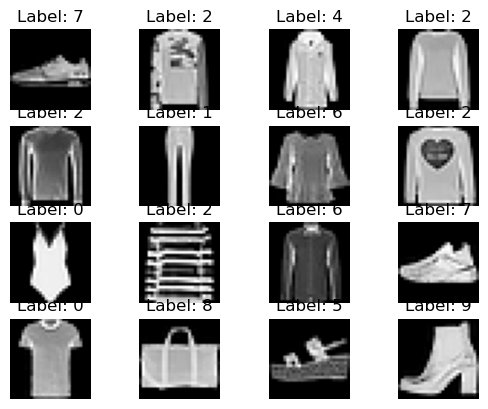

In [35]:
# utility to explore dataset
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

def load_dataset():
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5,), std=(0.5,))
    ])

    train_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST(root='data', train=True, download=True, transform=transform),
        batch_size=64, shuffle=True)
    return train_loader

train_loader = load_dataset()

examples = next(iter(train_loader))

# Get the images and labels from the examples.
images = examples[0] # shape torch.Size([64, 1, 28, 28])
labels = examples[1] # shape torch.Size([64])

# Get the 16 images from the tensor.
images = images[:16]
labels = labels[:16]

# Create a figure and a subplot grid of 4 rows and 4 columns.
fig, axs = plt.subplots(4, 4)

# Loop over the images and plot them in the subplots.
for i, (image, label) in enumerate(zip(images[:16], labels[:16])):
    axs[i // 4, i % 4].imshow(image.squeeze(), cmap='gray')
    axs[i // 4, i % 4].set_title(f"Label: {label}")
    axs[i // 4, i % 4].axis('off')

# Show the plot.
plt.show()